# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [3]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [18]:
import matplotlib.pyplot as plt
import numpy as np


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [5]:
# Seleccionar las columnas de Año y Nacimientos
seleccion = ['Año', 'Nacimientos']
df[seleccion].head()

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157


In [6]:
# Filtrar datos desde el año 2010
filtro = df['Año'] >= 2010
df[filtro]


,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [34]:
# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
print("Total de nacimientos:", total_nacimientos)

# total_defunciones 
total_defunciones = df['Defunciones'].sum()
print(f"Total de defunciones: {total_defunciones:,}")   


Total de nacimientos: 4846207
Total de defunciones: 975,501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [35]:
#Saldo Poblacional
df["Saldo Poblacional"] = df["Nacimientos"] - df["Defunciones"]
df.head()

,Año,Nacimientos,Defunciones,Saldo Poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [8]:
import matplotlib.pyplot as plt


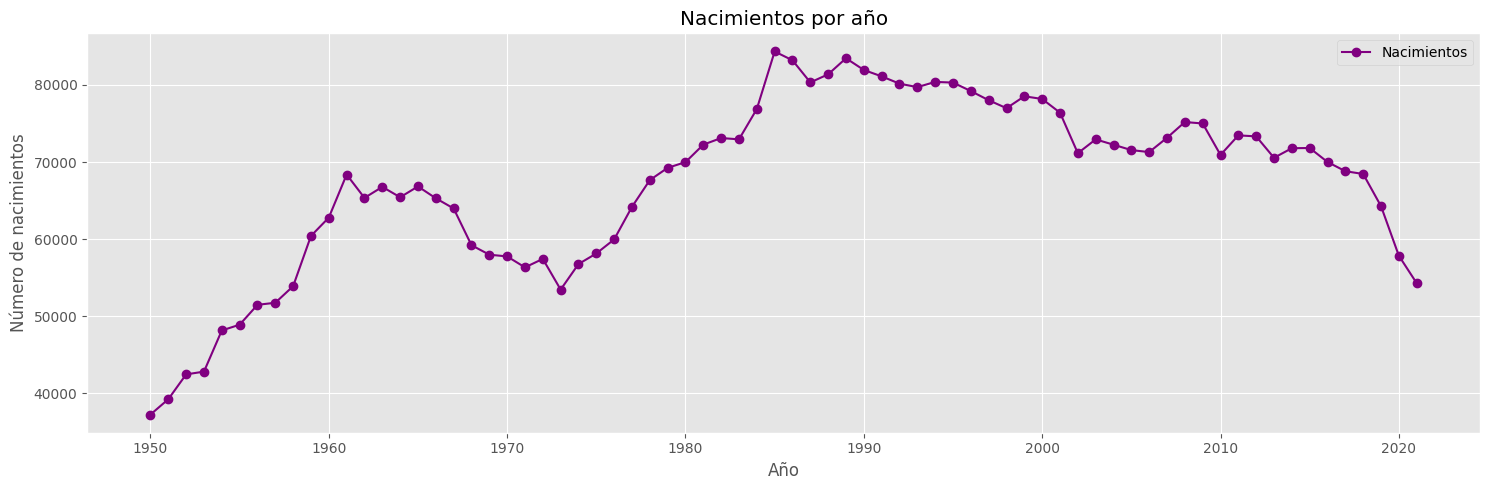

In [ ]:
#Configuraciones para las gráficas

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5)

fig, ax = plt.subplots()
anios = df["Año"]
nacimientos = df["Nacimientos"]

ax.plot(anios, nacimientos, marker = "o", color = "purple", label = "Nacimientos")

ax.set_title("Nacimientos por año")
ax.set_xlabel("Año")    
ax.set_ylabel("Número de nacimientos")
ax.legend()

plt.tight_layout() 

### **Gráfico de barras: Comparación de nacimientos y defunciones**

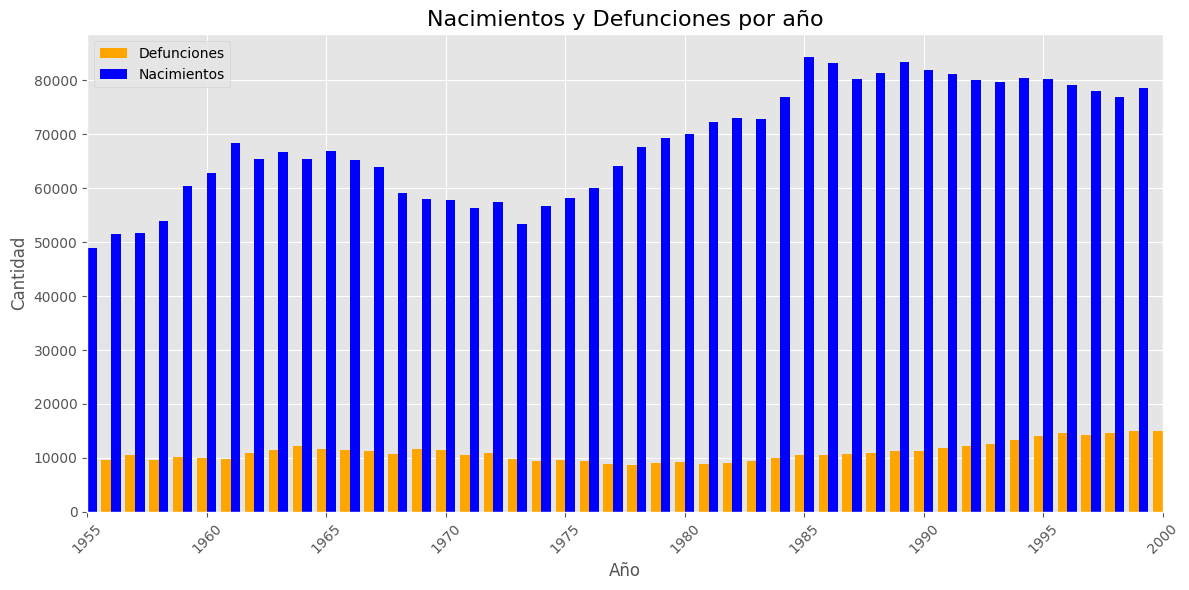

In [31]:
# Crear gráfico de barras
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()

#Mapeo
indices = np.arange(len(df))
ancho = 0.4

ax.bar(indices - ancho/2,  df["Defunciones"], width = ancho, color="orange", label="Defunciones")
ax.bar(indices + ancho/2, df["Nacimientos"], width = ancho, color="blue", label="Nacimientos")

ax.set_xticks(indices[::5], df["Año"][::5], rotation=45)

ax.set_title("Nacimientos y Defunciones por año", fontsize=16)
ax.set_xlabel("Año")    
ax.set_ylabel("Cantidad")
ax.legend() 

#Limites en x y
ax.set_xlim(5, 50)

plt.tight_layout()
plt.show()



C:\Users\peral\AppData\Local\Temp\ipykernel_22268\3506302724.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.bar(['Nacimientos', 'Defunciones'],[int(ultimo_anio['Nacimientos']), int(ultimo_anio['Defunciones'])], color=['seagreen', 'salmon'])
C:\Users\peral\AppData\Local\Temp\ipykernel_22268\3506302724.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


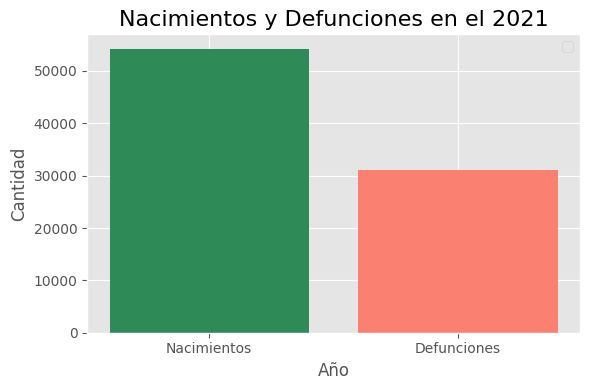

In [ ]:
# Filtrar datos del último año
filtro = df['Año'] == df['Año'].max()

ultimo_anio = df[filtro]

# Crear gráfico de barras
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (6, 4) # Define el tamaño por defecto de las figuras: 8x4 pulgadas


fig, ax = plt.subplots()


ax.bar(['Nacimientos', 'Defunciones'],[int(ultimo_anio['Nacimientos']), int(ultimo_anio['Defunciones'])], color=['seagreen', 'salmon'])


ax.set_title(f'Nacimientos y Defunciones en el {ultimo_anio["Año"].values[0]}', fontsize=16)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()
plt.tight_layout()
plt.show()

### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [ ]:
#


2. **Calcular promedios:**

In [ ]:
#

3. **Graficar:**

In [ ]:
#
